# Overview

The average number of people who has diabete is around 45 years old. The data has over 80,000 entries and it was collected from UCI Machine Learning Dataset. In this project, I am going to classify the features using Decision Tree and Random Forest and predict whether a patient is readmitted or not.

# Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Read File


The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
1. It is an inpatient encounter (a hospital admission).
2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
3. The length of stay was at least 1 day and at most 14 days.
4. Laboratory tests were performed during the encounter.
5. Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

In [2]:
diabete = pd.read_csv('diabetic_data.csv')

In [3]:
diabete.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
diabete.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# Check for Missing Values

In [6]:
diabete.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

Although it says there are no missing values, looking at the weight column, the values are '?'. This tells me that the values are missing but python did not register it. In order to fix it, I will change all values with '?' into 'NAN'

In [7]:
diabete.replace('?',np.nan,inplace= True)

Now that I replace the values with NAN, lets see how many value are missing

In [8]:
diabete.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

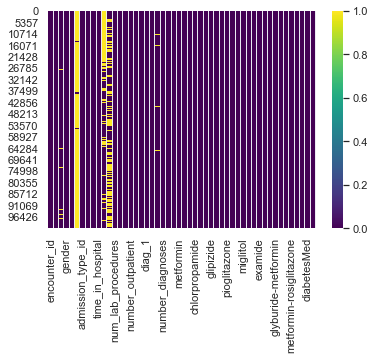

In [9]:
sns.heatmap(diabete.isnull(),cmap = 'viridis')

WOW, look at those missing values. Lets start cleaning the data.

# Data Cleaning

Initally by looking at the data, I am going to drop a few Features that I think have too many missing values such as weight, payer_code, and medical speciality. In addition to that, it looks like the data has converted some descriptions into codes. Lets fix that and convert them back.

|admission_type_id | description|
|:-----------------|------------|
|1 | Emergency|
|2 | Urgent|
|3 | Elective|
|4 | Newborn|
|5 | Not Available|
|6 | NULL|
|7 | Trauma Center|
|8 | Not Mapped|


|discharge_disposition_id|description|
|-----------------|:-----------:|
|1|Discharged to home|
|2|Discharged/transferred to another short term hospital|
|3|Discharged/transferred to SNF|
|4|Discharged/transferred to ICF|
|5|Discharged/transferred to another type of inpatient care institution|
|6|Discharged/transferred to home with home health service|
|7|Left AMA|
|8|Discharged/transferred to home under care of Home IV provider|
|9|Admitted as an inpatient to this hospital|
|10|Neonate discharged to another hospital for neonatal aftercare|
|11|Expired|
|12|Still patient or expected to return for outpatient services|
|13|Hospice / home|
|14|Hospice / medical facility|
|15|Discharged/transferred within this institution to Medicare approved swing bed|
|16|Discharged/transferred/referred another institution for outpatient services|
|17|Discharged/transferred/referred to this institution for outpatient services|
|18|NULL|
|19|Expired at home. Medicaid only, hospice.|
|20|Expired in a medical facility. Medicaid only, hospice.|
|21|Expired, place unknown. Medicaid only, hospice.|
|22|Discharged/transferred to another rehab fac including rehab units of a hospital.|
|23|Discharged/transferred to a long term care hospital.|
|24|Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.|
|25|Not Mapped|
|26|Unknown/Invalid|
|27|Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere|
|28|Discharged/transferred to a federal health care facility.|
|29|Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital|
|30|Discharged/transferred to a Critical Access Hospital (CAH).|

|admission_source_id|description|
|-------------------|-----------|
|1|Physician Referral|
|2|Clinic Referral|
|3|HMO Referral|
|4|Transfer from a hospital|
|5|Transfer from a Skilled Nursing Facility (SNF)|
|6|Transfer from another health care facility|
|7|Emergency Room|
|8|Court/Law Enforcement|
|9|Not Available|
|10|Transfer from critial access hospital|
|11|Normal Delivery|
|12|Premature Delivery|
|13|Sick Baby|
|14|Extramural Birth|
|15|Not Available|
|16|NULL|
|17|Transfer From Another Home Health Agency|
|18|Readmission to Same Home Health Agency|
|19|Not Mapped|
|20|Unknown/Invalid|
|21|Transfer from hospital inpt/same fac reslt in a sep claim|
|22|Born inside this hospital|
|23|Born outside this hospital|
|24|Transfer from Ambulatory Surgery Center|
|25|Transfer from Hospice|

Convert all numerical values back to text for admission_source_id, admission_type_id, and discharge_dispositon_id 

In [10]:
diabete['admission_source_id'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26],['Physician Referral','Clinic Referral','HMO Referral','Transfer from a hospital','Transfer from a skilled nurshing Facility(SNF)','Transfer from another health care facility','Emergency Room','Court/Law Enforcement',np.nan,'Transfer from critical access hospital','Noraml Delivery','Premature Delivery','Sick Baby','Extermural Birth',np.nan,np.nan,'Transfer From Another Home Health Agency','Readmission to Same Home Health Agency','Not Mapped',np.nan,'Transfer from hospital','Born inside this hospital','born outside this hospital','Transfer From Ambulatory Surgery Center','Transfer from Hospice'],inplace=True)    

In [11]:
diabete['admission_type_id'].replace([1,2,3,4,5,6,7,8],['Emergency','Urgent','Elective','Newborn',np.nan,np.nan,'Trauma Center','Not Mapped'],inplace=True)

In [12]:
diabete['discharge_disposition_id'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],['Discharged to home','Discharged/transferred to another short term hospital','Discharged/transferred to SNF','Discharged/transferred to ICF','Discharged/transferred to another type of inpatient care institution','Discharged/transferred to home with home health service','Left AMA','Discharged/transferred to home under care of Home IV provider','Admitted as an inpatient to this hospital','Neonate discharged to another hospital for neonatal aftercare','Expired','Still patient or expected to return for outpatient services','Hospice / home','Hospice / medical facility','Discharged/transferred within this institution to Medicare approved swing bed','Discharged/transferred/referred another institution for outpatient services','Discharged/transferred/referred to this institution for outpatient services',np.nan,'Expired at home. Medicaid only, hospice','Expired in a medical facility. Medicaid only, hospice','Expired, place unknown. Medicaid only, hospice','Discharged/transferred to another rehab fac including rehab units of a hospital','Discharged/transferred to a long term care hospital','Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.','Not Mapped',np.nan,'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere','Discharged/transferred to a federal health care facility','Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital','Discharged/transferred to a Critical Access Hospital (CAH)'],inplace=True)

After I finish replacing the values, I begin dropping featuers that have too many missing values

In [13]:
diabete.drop(['weight','payer_code','medical_specialty'],axis=1, inplace = True)

In [14]:
diabete.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,Not Mapped,Physician Referral,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),Emergency,Discharged to home,Emergency Room,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),Emergency,Discharged to home,Emergency Room,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),Emergency,Discharged to home,Emergency Room,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),Emergency,Discharged to home,Emergency Room,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),Urgent,Discharged to home,Clinic Referral,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),Elective,Discharged to home,Clinic Referral,4,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),Emergency,Discharged to home,Emergency Room,5,73,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),Urgent,Discharged to home,Transfer from a hospital,13,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),Elective,Discharged/transferred to SNF,Transfer from a hospital,12,33,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Race has missing features, but I do not want to reaplce it with some featues. I think the best appraoch would be to remove those missing values from the data set to keep it accurate.

In [15]:
diabete.dropna(inplace=True)

In [16]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83746 entries, 1 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              83746 non-null  int64 
 1   patient_nbr               83746 non-null  int64 
 2   race                      83746 non-null  object
 3   gender                    83746 non-null  object
 4   age                       83746 non-null  object
 5   admission_type_id         83746 non-null  object
 6   discharge_disposition_id  83746 non-null  object
 7   admission_source_id       83746 non-null  object
 8   time_in_hospital          83746 non-null  int64 
 9   num_lab_procedures        83746 non-null  int64 
 10  num_procedures            83746 non-null  int64 
 11  num_medications           83746 non-null  int64 
 12  number_outpatient         83746 non-null  int64 
 13  number_emergency          83746 non-null  int64 
 14  number_inpatient     

Great! our data removed all missing values, but there seems to be an issue with the age feature. Apparently, the data inputted comes in a range and not the actual data. Since age is very important for diabetes, I think it's appropriate to replace it with its mean. 

In [17]:
diabete['age'].replace('[0-10)',5,inplace = True)
diabete['age'].replace('[10-20)',15,inplace=True)
diabete['age'].replace('[20-30)',25,inplace = True)
diabete['age'].replace('[30-40)',35,inplace=True)
diabete['age'].replace('[40-50)',45,inplace = True)
diabete['age'].replace('[50-60)',55,inplace=True)
diabete['age'].replace('[60-70)',65,inplace = True)
diabete['age'].replace('[70-80)',75,inplace=True)
diabete['age'].replace('[80-90)',85,inplace = True)
diabete['age'].replace('[90-100)',95,inplace=True)

In [18]:
diabete['age'].value_counts()

75    21205
65    18801
55    14387
85    14284
45     7852
35     3064
95     2329
25     1331
15      433
5        60
Name: age, dtype: int64

Age looks more better. Readmitted feature seems to have '>30' instead of 'Yes'. to fix that, I am going to replace the it to yes

In [19]:
diabete['readmitted'].value_counts()

NO     44791
>30    29504
<30     9451
Name: readmitted, dtype: int64

In [20]:
diabete['readmitted'].replace(['>30','<30'],'yes',inplace = True)

Lets begin looking at gender to see if there are any values that need to be replaced

In [21]:
diabete['gender'].value_counts() 

Female             45256
Male               38489
Unknown/Invalid        1
Name: gender, dtype: int64

There seems to be one value that is neither male or Female. Lets replace that as a missig value because we cannot assume a gender

In [22]:
diabete['gender'].replace('Unknown/Invalid',np.nan, inplace=True)

In [23]:
diabete['gender'].value_counts()

Female    45256
Male      38489
Name: gender, dtype: int64

In [24]:
diabete.dropna(inplace=True)

Now that we finish that, I am going to perform some exploratory analysis

# Exploratory Data Analaysis

I am going to check how many people are readmitted back to the hospital.

Text(0, 0.5, 'count')

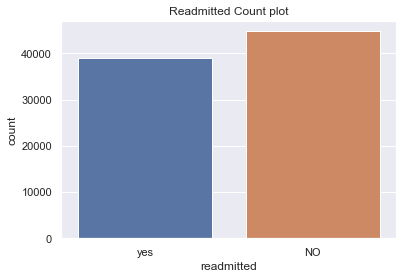

In [25]:
sns.countplot(diabete['readmitted'])
plt.title('Readmitted Count plot')
plt.xlabel('readmitted')
plt.ylabel('count')

Next I am going to look at the ehnicity and see who has been readmitted.

Text(0, 0.5, 'count')

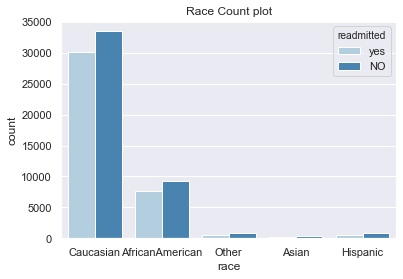

In [26]:
sns.countplot(x='race',data= diabete,hue='readmitted',palette='Blues')
plt.title('Race Count plot')
plt.xlabel('race')
plt.ylabel('count')

Just by looking at the chart, we can tell that majority of the patients are cacausing who have been readmitted after having medications for diabetes.

Text(0, 0.5, 'count')

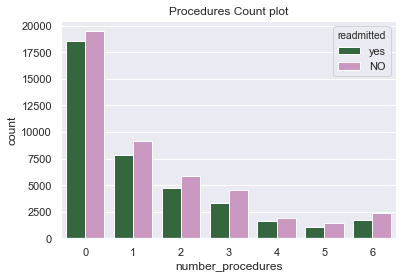

In [27]:
sns.countplot( x='num_procedures',data= diabete,hue='readmitted',palette='cubehelix')
plt.title('Procedures Count plot')
plt.xlabel('number_procedures')
plt.ylabel('count')

it looks like procedures does not play a big role is readmitted as there are more 'no' than 'yes'. Now lets look at the age gap

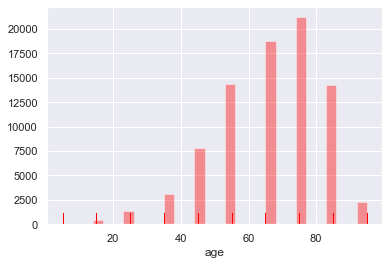

In [28]:
sns.distplot(diabete['age'],rug=True,kde=False,bins=30,color='red')

it looks like most of the people that goes back to the hospital for diabetes are in their 45-80, which the average age for diabetes. Lets see if diabetes medication plays a role in readmitted.

Text(0, 0.5, 'count')

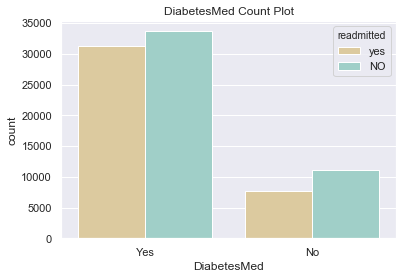

In [29]:
sns.countplot( x='diabetesMed',data= diabete,hue='readmitted',palette='BrBG')
plt.title('DiabetesMed Count Plot')
plt.xlabel('DiabetesMed')
plt.ylabel('count')

Eveything is looking great, lets begin the model building

# Model Building

First, I am going to create dummy variables for features that have text.

In [30]:
x= pd.get_dummies(diabete.drop('readmitted',axis=1),drop_first=True)
y=diabete['readmitted']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.3)

Import Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree = DecisionTreeClassifier()

Fitting our training set

In [45]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Lets create our prediction and score our result

In [46]:
dtree_pred = dtree.predict(x_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(y_test,dtree_pred))
print(confusion_matrix(y_test,dtree_pred))

              precision    recall  f1-score   support

          NO       0.62      0.62      0.62     13441
         yes       0.56      0.57      0.56     11683

    accuracy                           0.59     25124
   macro avg       0.59      0.59      0.59     25124
weighted avg       0.59      0.59      0.59     25124

[[8319 5122]
 [5080 6603]]


Not bad! The model was able to predict 62% for NO and 56% for yes. Lets see how we can improve it with random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

setting our estimators to 200, which represents the number of trees I want

In [34]:
rf = RandomForestClassifier(n_estimators= 200)

fitting our decision tree model

In [35]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Predicting our model and get an accuracy score

In [38]:
rf_pred= rf.predict(x_test)

In [42]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[9957 3484]
 [4963 6720]]
              precision    recall  f1-score   support

          NO       0.67      0.74      0.70     13441
         yes       0.66      0.58      0.61     11683

    accuracy                           0.66     25124
   macro avg       0.66      0.66      0.66     25124
weighted avg       0.66      0.66      0.66     25124



The model was definitely a lot better. This is a huge improvement compared to our previous model.

# Conclusion

The main of this focus is to classify whether a patient will be readmitted after being diagnosed with diabetes and given proper medication. The data had over 100,000 entries but was reduced around 80,000 entries after preprocessing. The models used were Decision Tree and Random Forest. Both models performed very well and I am happy with the results. 